## 3b. Seaborn

Seaborn is a library for statistical data visualization, built on top of Matplotlib. It provides a higher-level interface for more complex visualizations, and a slightly changed style.

### Table of contents

- Seaborn
  - Relationship Plots
    - Line
    - Scatter
  - Categorical Plots
    - Swarmplots
    - Boxplots
    - Violinplots
  - Distribution Plots
    - Histograms
    - KDE
    - Bivariate
  - Multiple Plots
    - Plot Grids
    - Jointplots

---

In [1]:
import numpy as np   # we'll use numpy to generate dummy data
import pandas as pd  # we'll use pandas to read and manipulate datasets

import warnings
warnings.simplefilter('ignore', FutureWarning)

import matplotlib.pyplot as plt
# display figures alongside cell output
%matplotlib inline

import matplotlib

**ℹ️ Tip**: it's not by mistake that the following cell is separate from the previous. There is a small bug that causes it not to be executed correctly if they are ran at the same time. This is not limited to Jupyter notebooks.

In [2]:
matplotlib.rcParams['figure.dpi'] = 100  # make figures large
%config InlineBackend.figure_format = 'retina'  # make figures crisp

---

In [3]:
import seaborn as sns
sns.set()  # apply Seaborn's style to future charts

### Relationship Plots

To make examples more meaningful, throughout this section, we'll plot actual datasets. One such dataset is the `tips` one, which logs the bills and tips in a restaurant:

In [4]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Scatter

Similar to Matplotlib's counterpart, but with a slightly changed style:

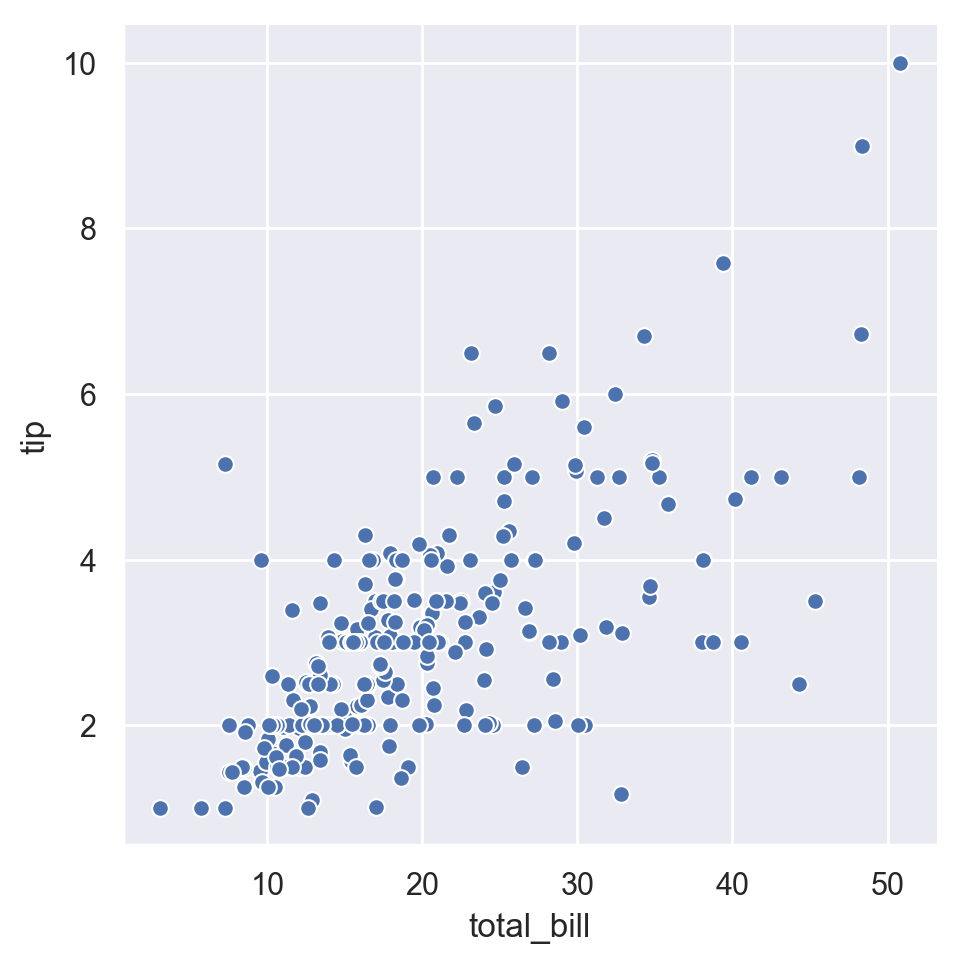

In [5]:
sns.relplot(data=tips, x='total_bill', y='tip');

Quickly add additional information such as the time of the meal (color), the customer's gender (shape) and the party size (size of marker), from the underlying dataset:

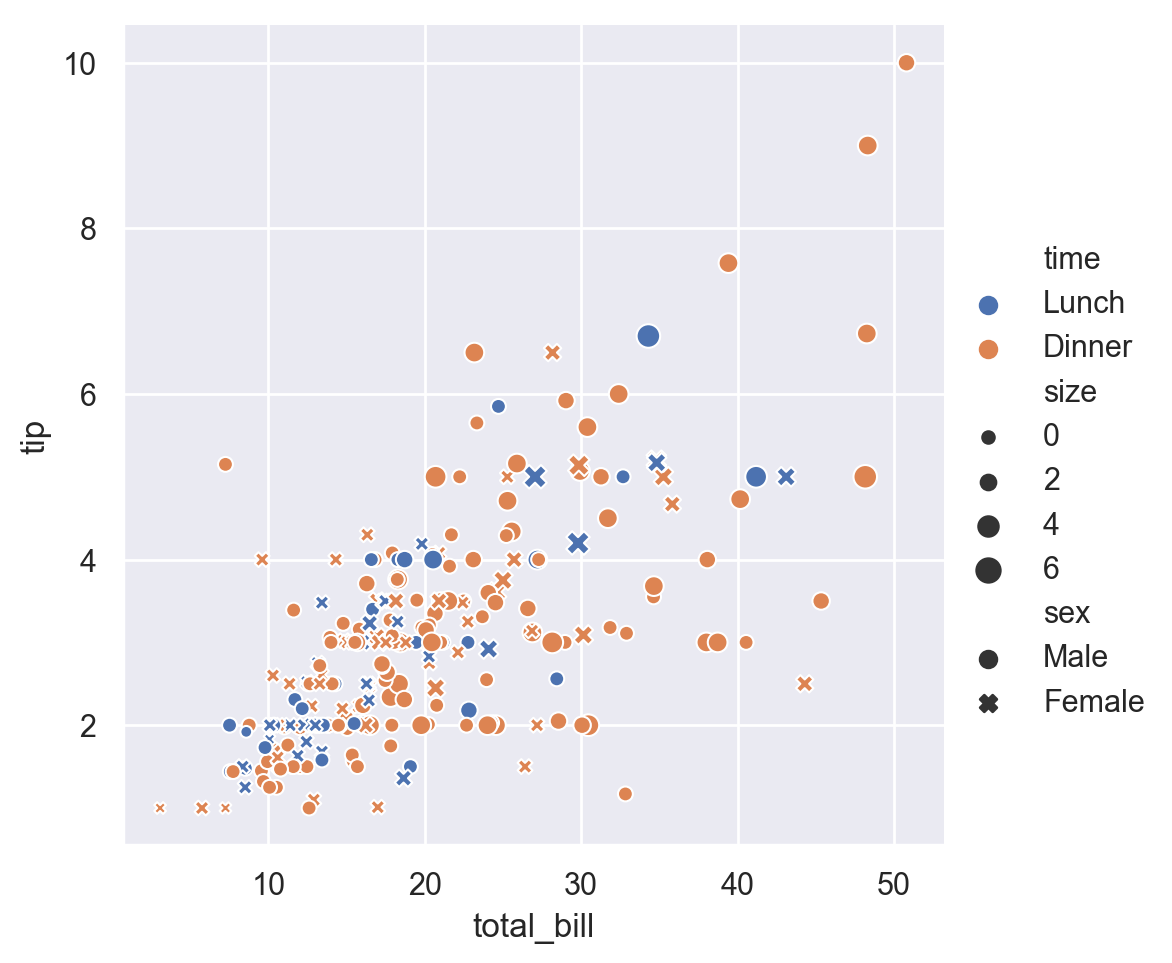

In [6]:
sns.relplot(
    data=tips,
    x='total_bill', 
    y='tip', 
    hue='time',
    style='sex',
    size='size',
);

#### Line

Another example dataset, of continuous measurements (over time):

In [7]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


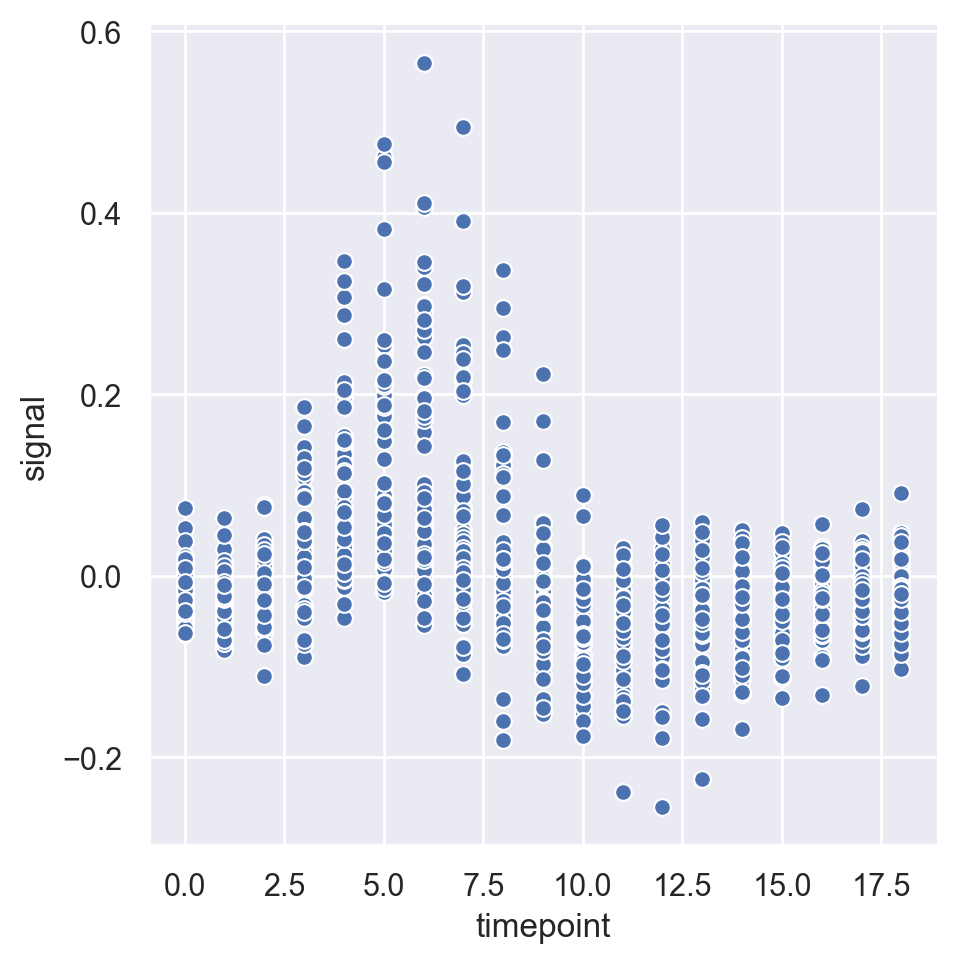

In [8]:
sns.relplot(data=fmri, x='timepoint', y='signal');

Aggregating it into a line, with mean and confidence interval (95%) is more informative:

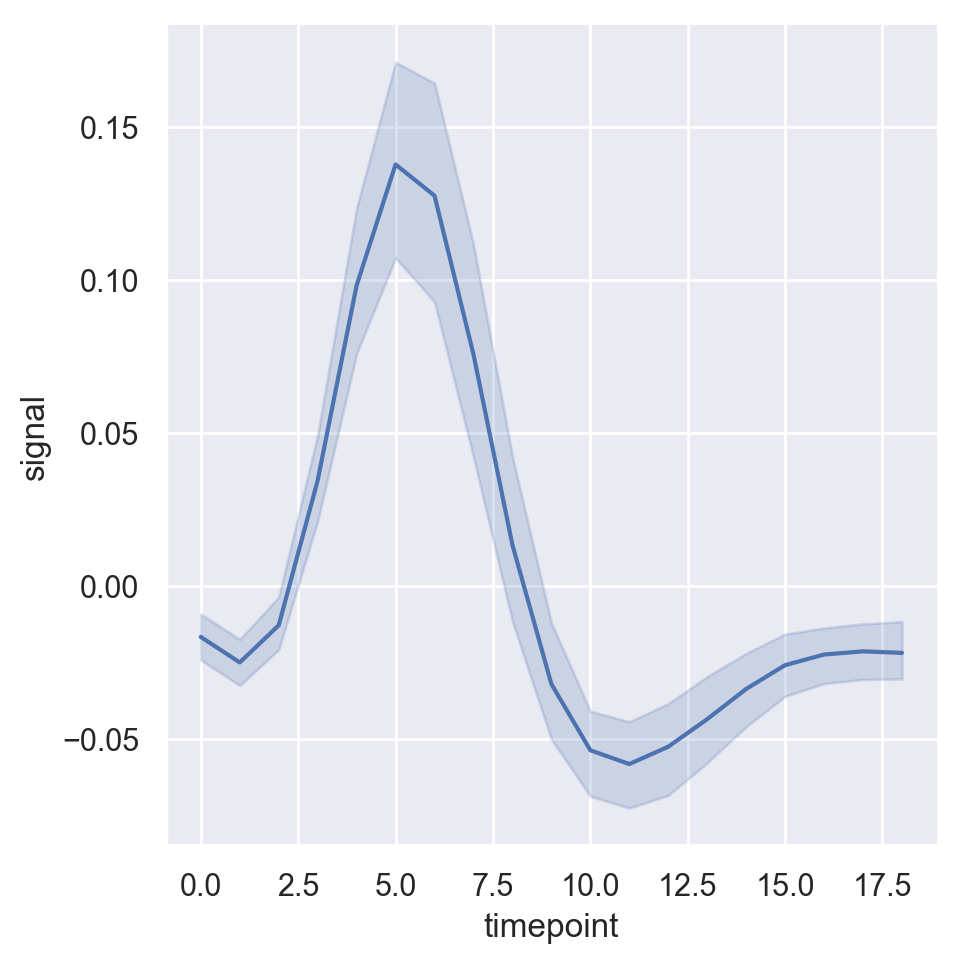

In [9]:
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line');

Show additional information: the region (color) and event (line style):

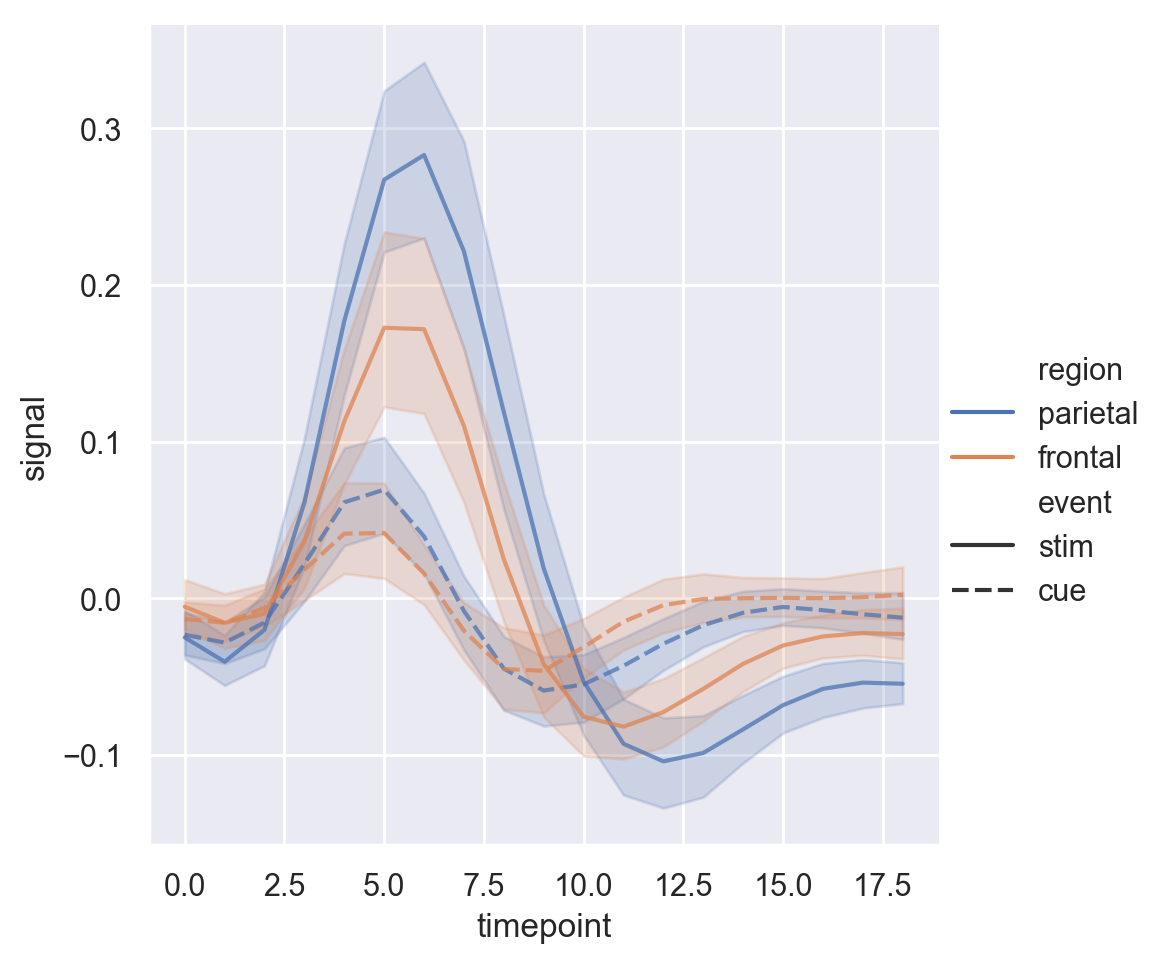

In [10]:
sns.relplot(
    kind='line',
    data=fmri,
    x='timepoint',
    y='signal',
    hue='region',
    style='event',
    alpha=.75,
);

### Categorical plots

We'll exemplify on the same, `tips` dataset

#### Between categories

The x axis is categorical, so points are grouped together and are jittered a little as to not overlap, but still show the amount of points in each category/total bill segment. This is called a swarmplot:

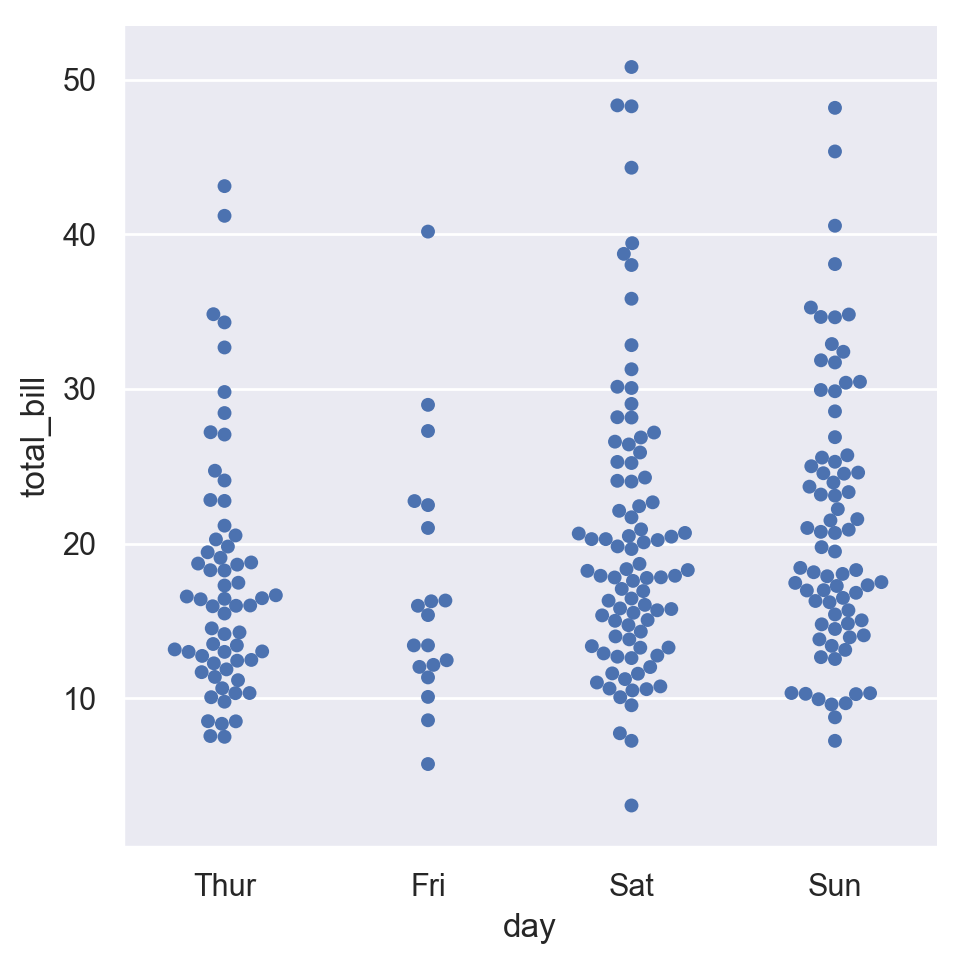

In [11]:
sns.catplot(x='day', y='total_bill', kind='swarm', data=tips, color='C0');

Show additional information:

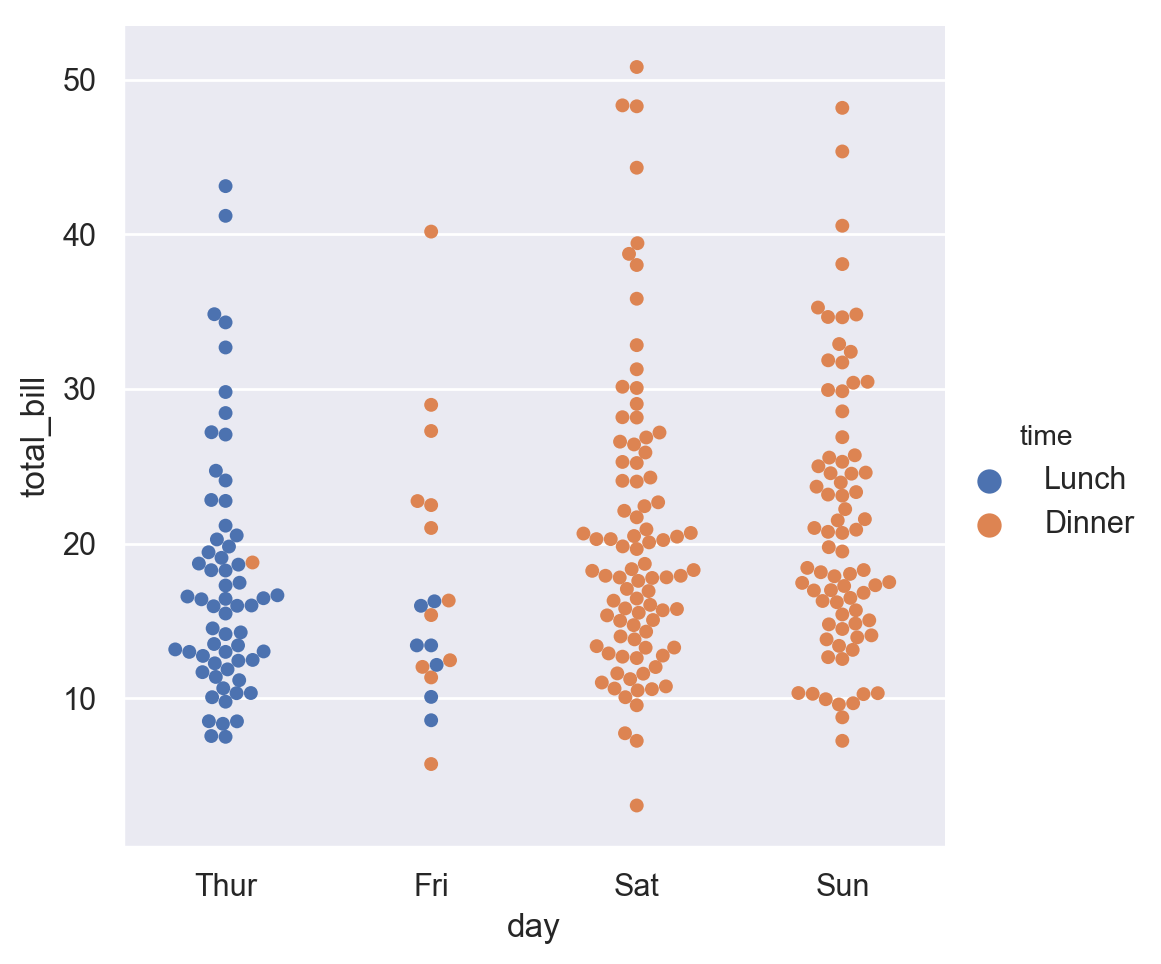

In [12]:
sns.catplot(
    kind='swarm',
    data=tips,
    x='day',
    y='total_bill',
    hue='time',
);

#### Distribution

Boxplot: the box shows the three quartiles, and whiskers extend to show the smallest and largest values, excepting outliers which are plotted separatedly

The three quartiles are:
 1. lower quartile (25% of elements are less than it)
 2. median (50% of elements are less than it)
 3. upper quartile (75% elements are less than it)
 
A point is considered an outlier if it is farther than 1.5 IQR from the lower and upper quartiles.
IQR, the inter-quartile range, is simply the distance between the lower and upper quartiles.

In [13]:
tips.groupby('day').total_bill.describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,17.682742,7.886170,7.51,12.4425,16.20,20.1550,43.11
Fri,19.0,17.151579,8.302660,5.75,12.0950,15.38,21.7500,40.17
Sat,87.0,20.441379,9.480419,3.07,13.9050,18.24,24.7400,50.81
Sun,76.0,21.410000,8.832122,7.25,14.9875,19.63,25.5975,48.17


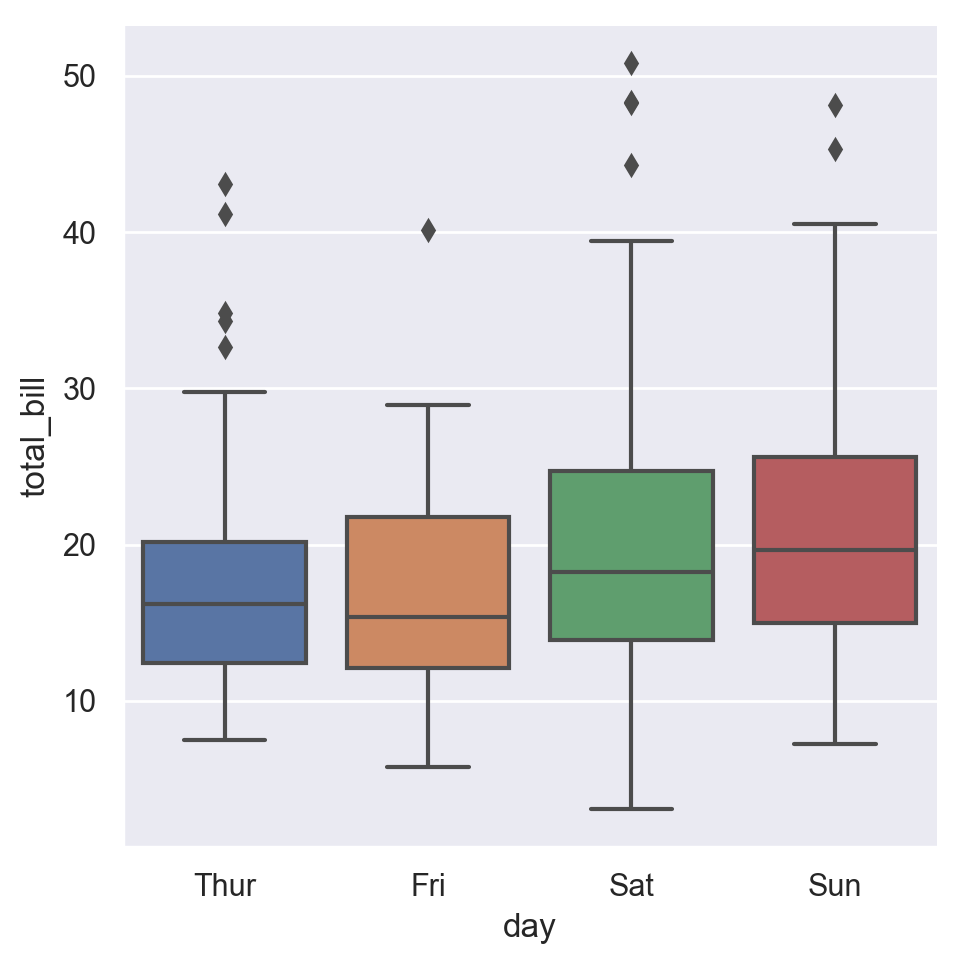

In [14]:
sns.catplot(kind='box', data=tips, x='day', y='total_bill');

Similar to the boxplot, but shows more information about the distribution. Instead of the quartiles and ranges, it shows a KDE. Think of it as a continuous histogram. Its shape allows it to show data for two types of observations for each x-axis categorical value:

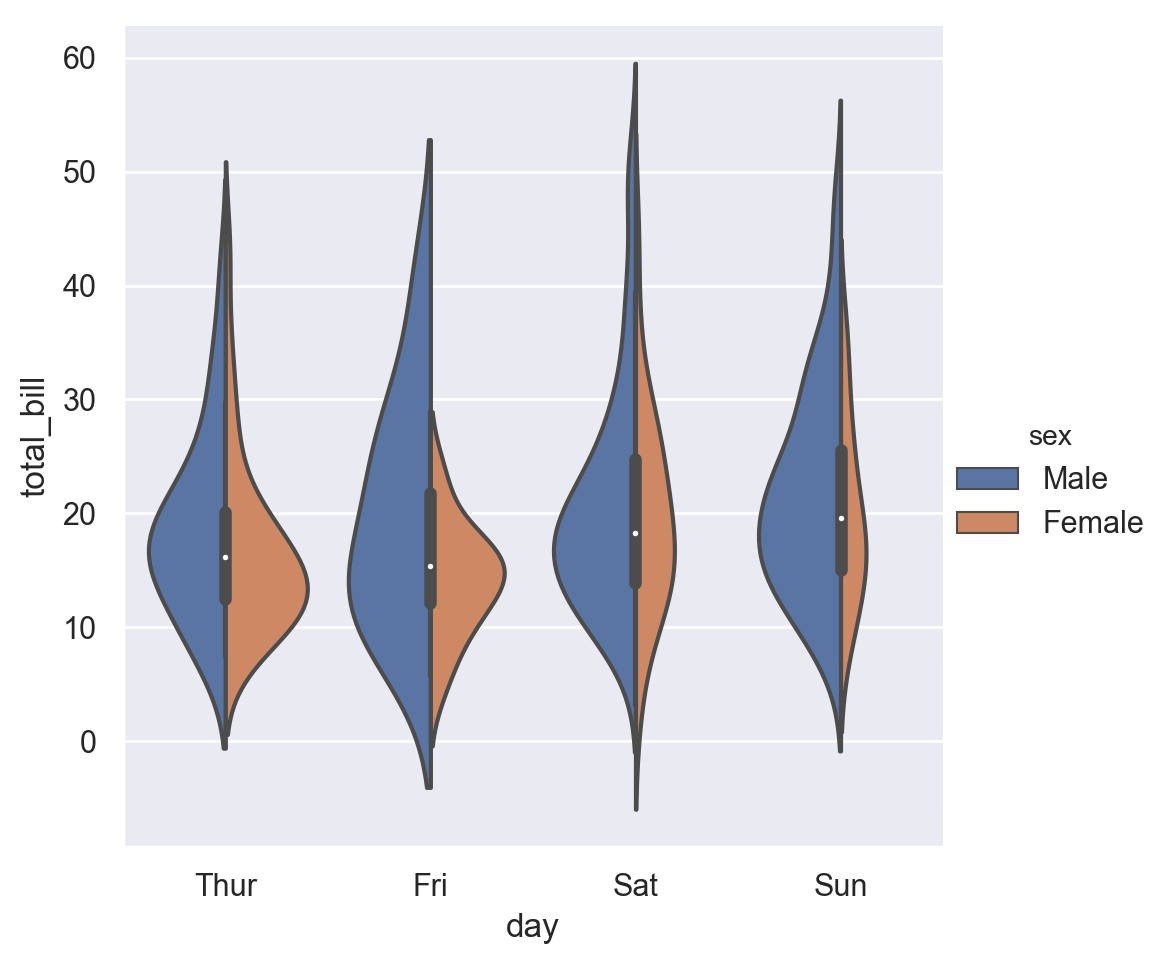

In [15]:
sns.catplot(
    kind='violin',
    split=True,
    
    data=tips,
    x='day',
    y='total_bill',
    hue='sex',
    scale='count',
);

The width of each KDE shows the amount of observations falling in that segment

### Distributions

We'll exemplify on the famous `iris` dataset, containing measurements of various species of flowers:

In [16]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
len(iris)

150

In [18]:
iris.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

#### Univariate

A **histogram** (the columns) shows how many observations fall in each _bin_.

A **KDE**, Kernel Density Estimation, fits a probability density function over the distribution. You can think of it as a continuous approximation of the histogram.

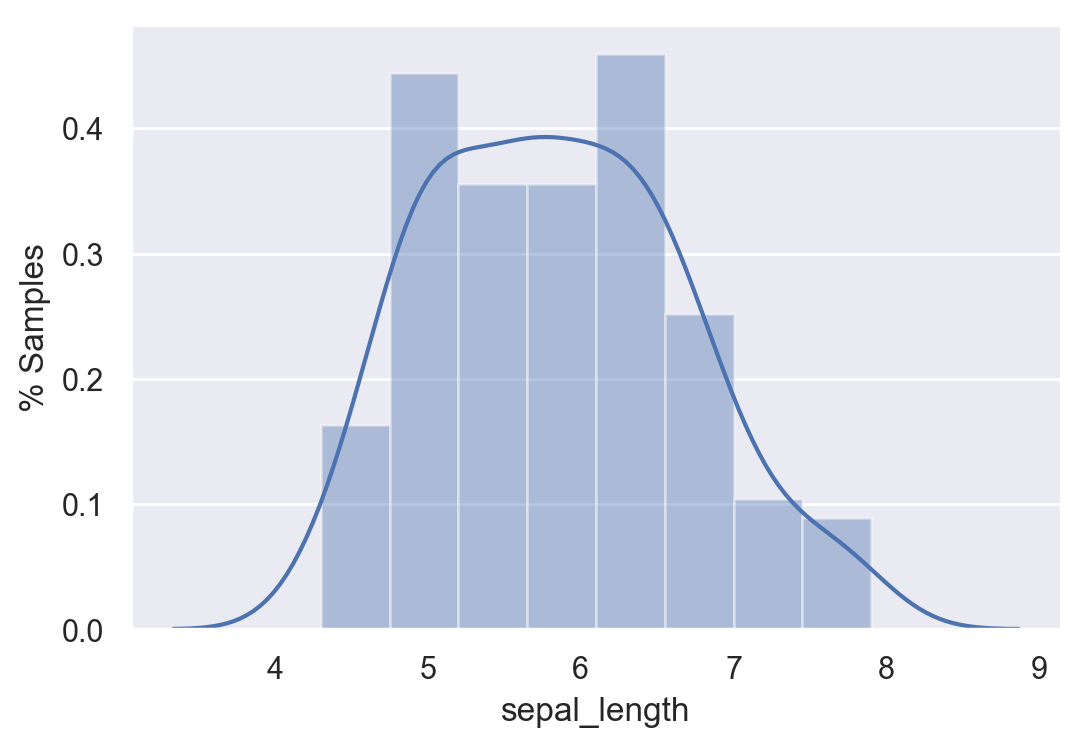

In [19]:
sns.distplot(iris.sepal_length)
plt.gca().xaxis.grid(False)
plt.ylabel('% Samples');

**ℹ️ Tip**: It seems like our distribution is made up of multiple composing distributions. Since the data comes from natural phenomena, we expect it to be somewhat normally shaped. Plotting the KDE for each species reveals the underlying distributions:

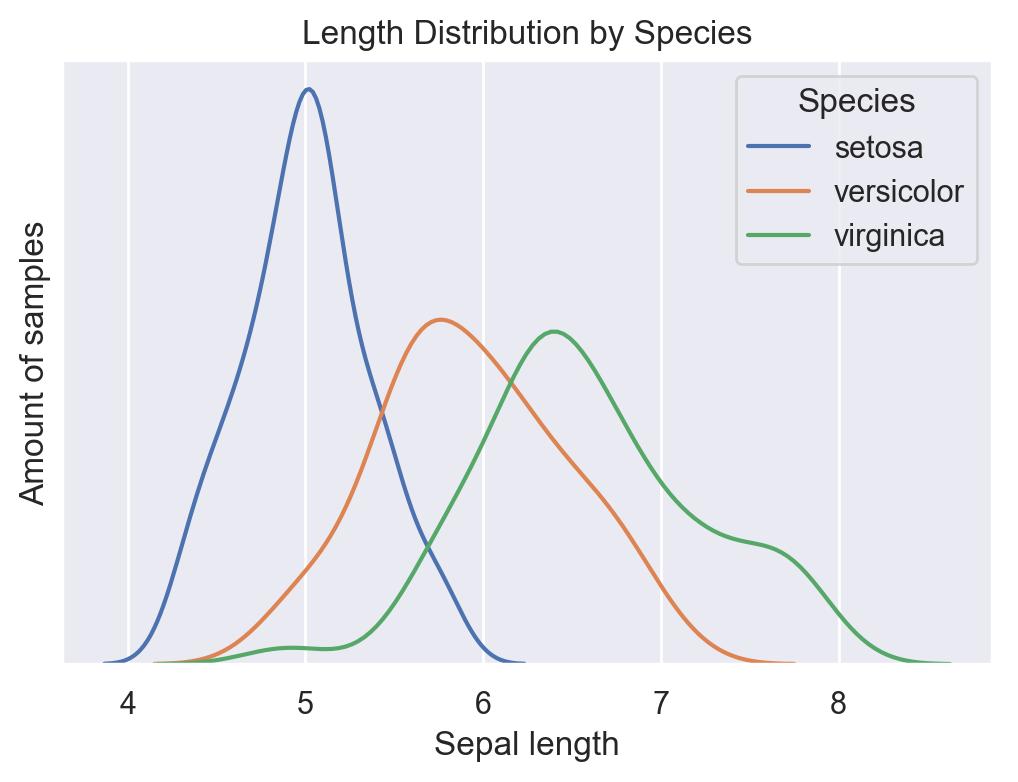

In [20]:
for species, sub_df in iris.groupby('species'):
    sns.kdeplot(sub_df.sepal_length, label=species)

plt.legend(title='Species')
plt.xlabel('Sepal length')
plt.ylabel('Amount of samples')
plt.yticks([])
plt.title('Length Distribution by Species');

#### Bivariate

Scatterplot in the center with univariate histograms on the sides:

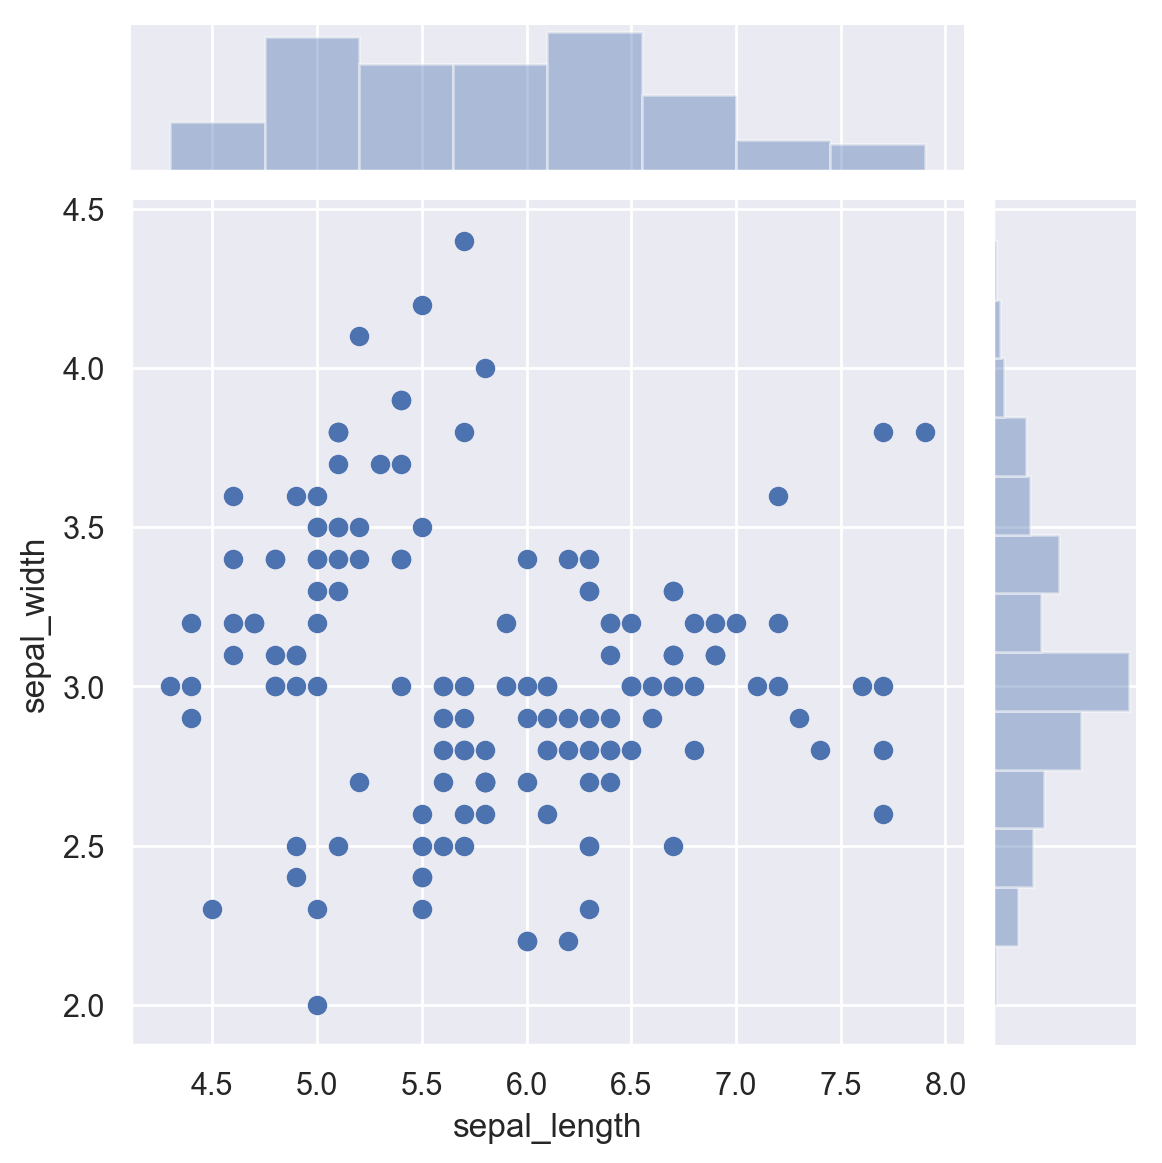

In [21]:
sns.jointplot(data=iris, x='sepal_length', y='sepal_width');

Bivariate (2D) analogous of KDE:

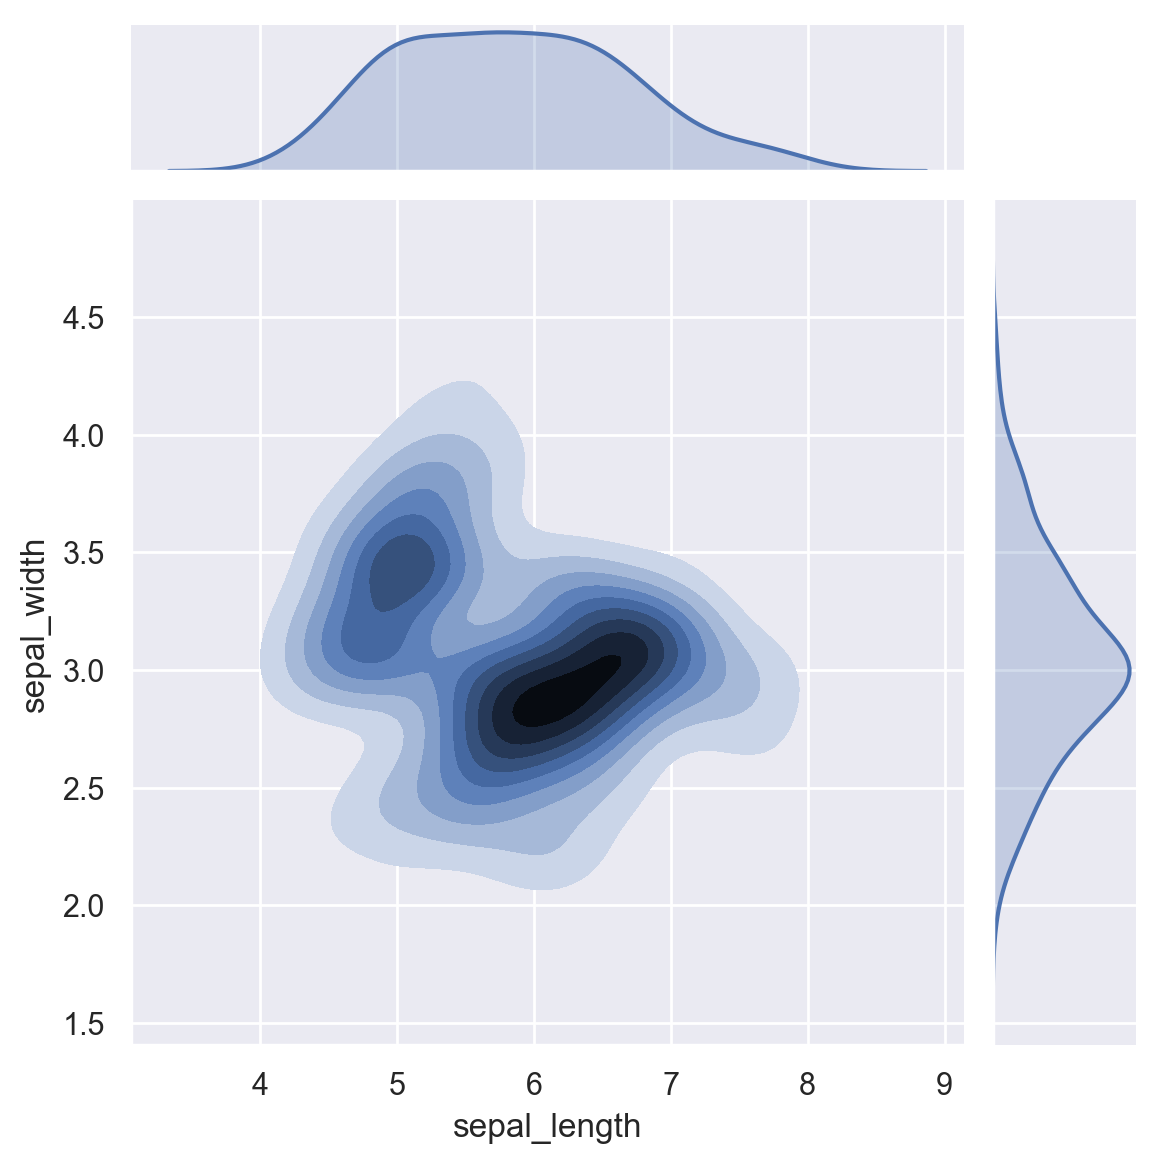

In [22]:
sns.jointplot(kind='kde', data=iris, x='sepal_length', y='sepal_width', shade_lowest=False);

Similarly, we can decompose the distributions:

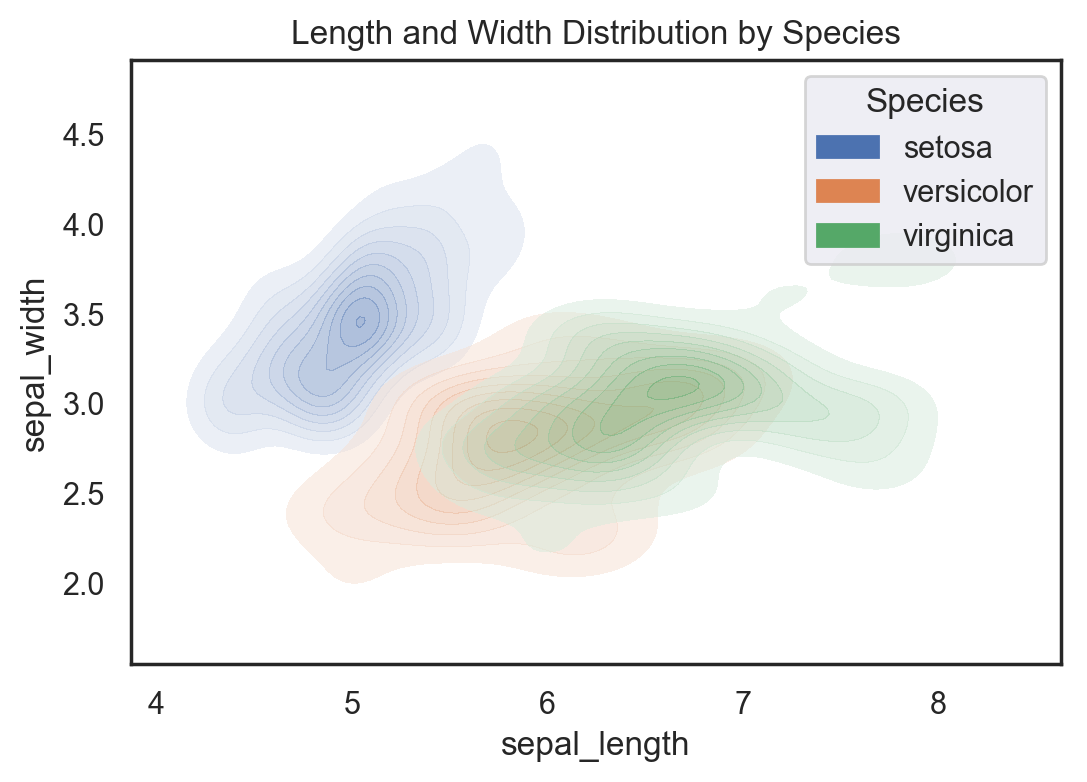

In [23]:
with sns.axes_style('white'):
    for species, sub_df in iris.groupby('species'):
        sns.kdeplot(sub_df.sepal_length, sub_df.sepal_width,  label=species, 
                    shade=True, shade_lowest=False, alpha=.5)

plt.legend(title='Species')
plt.title('Length and Width Distribution by Species');

More than two variables: just have multiple pairwise plots

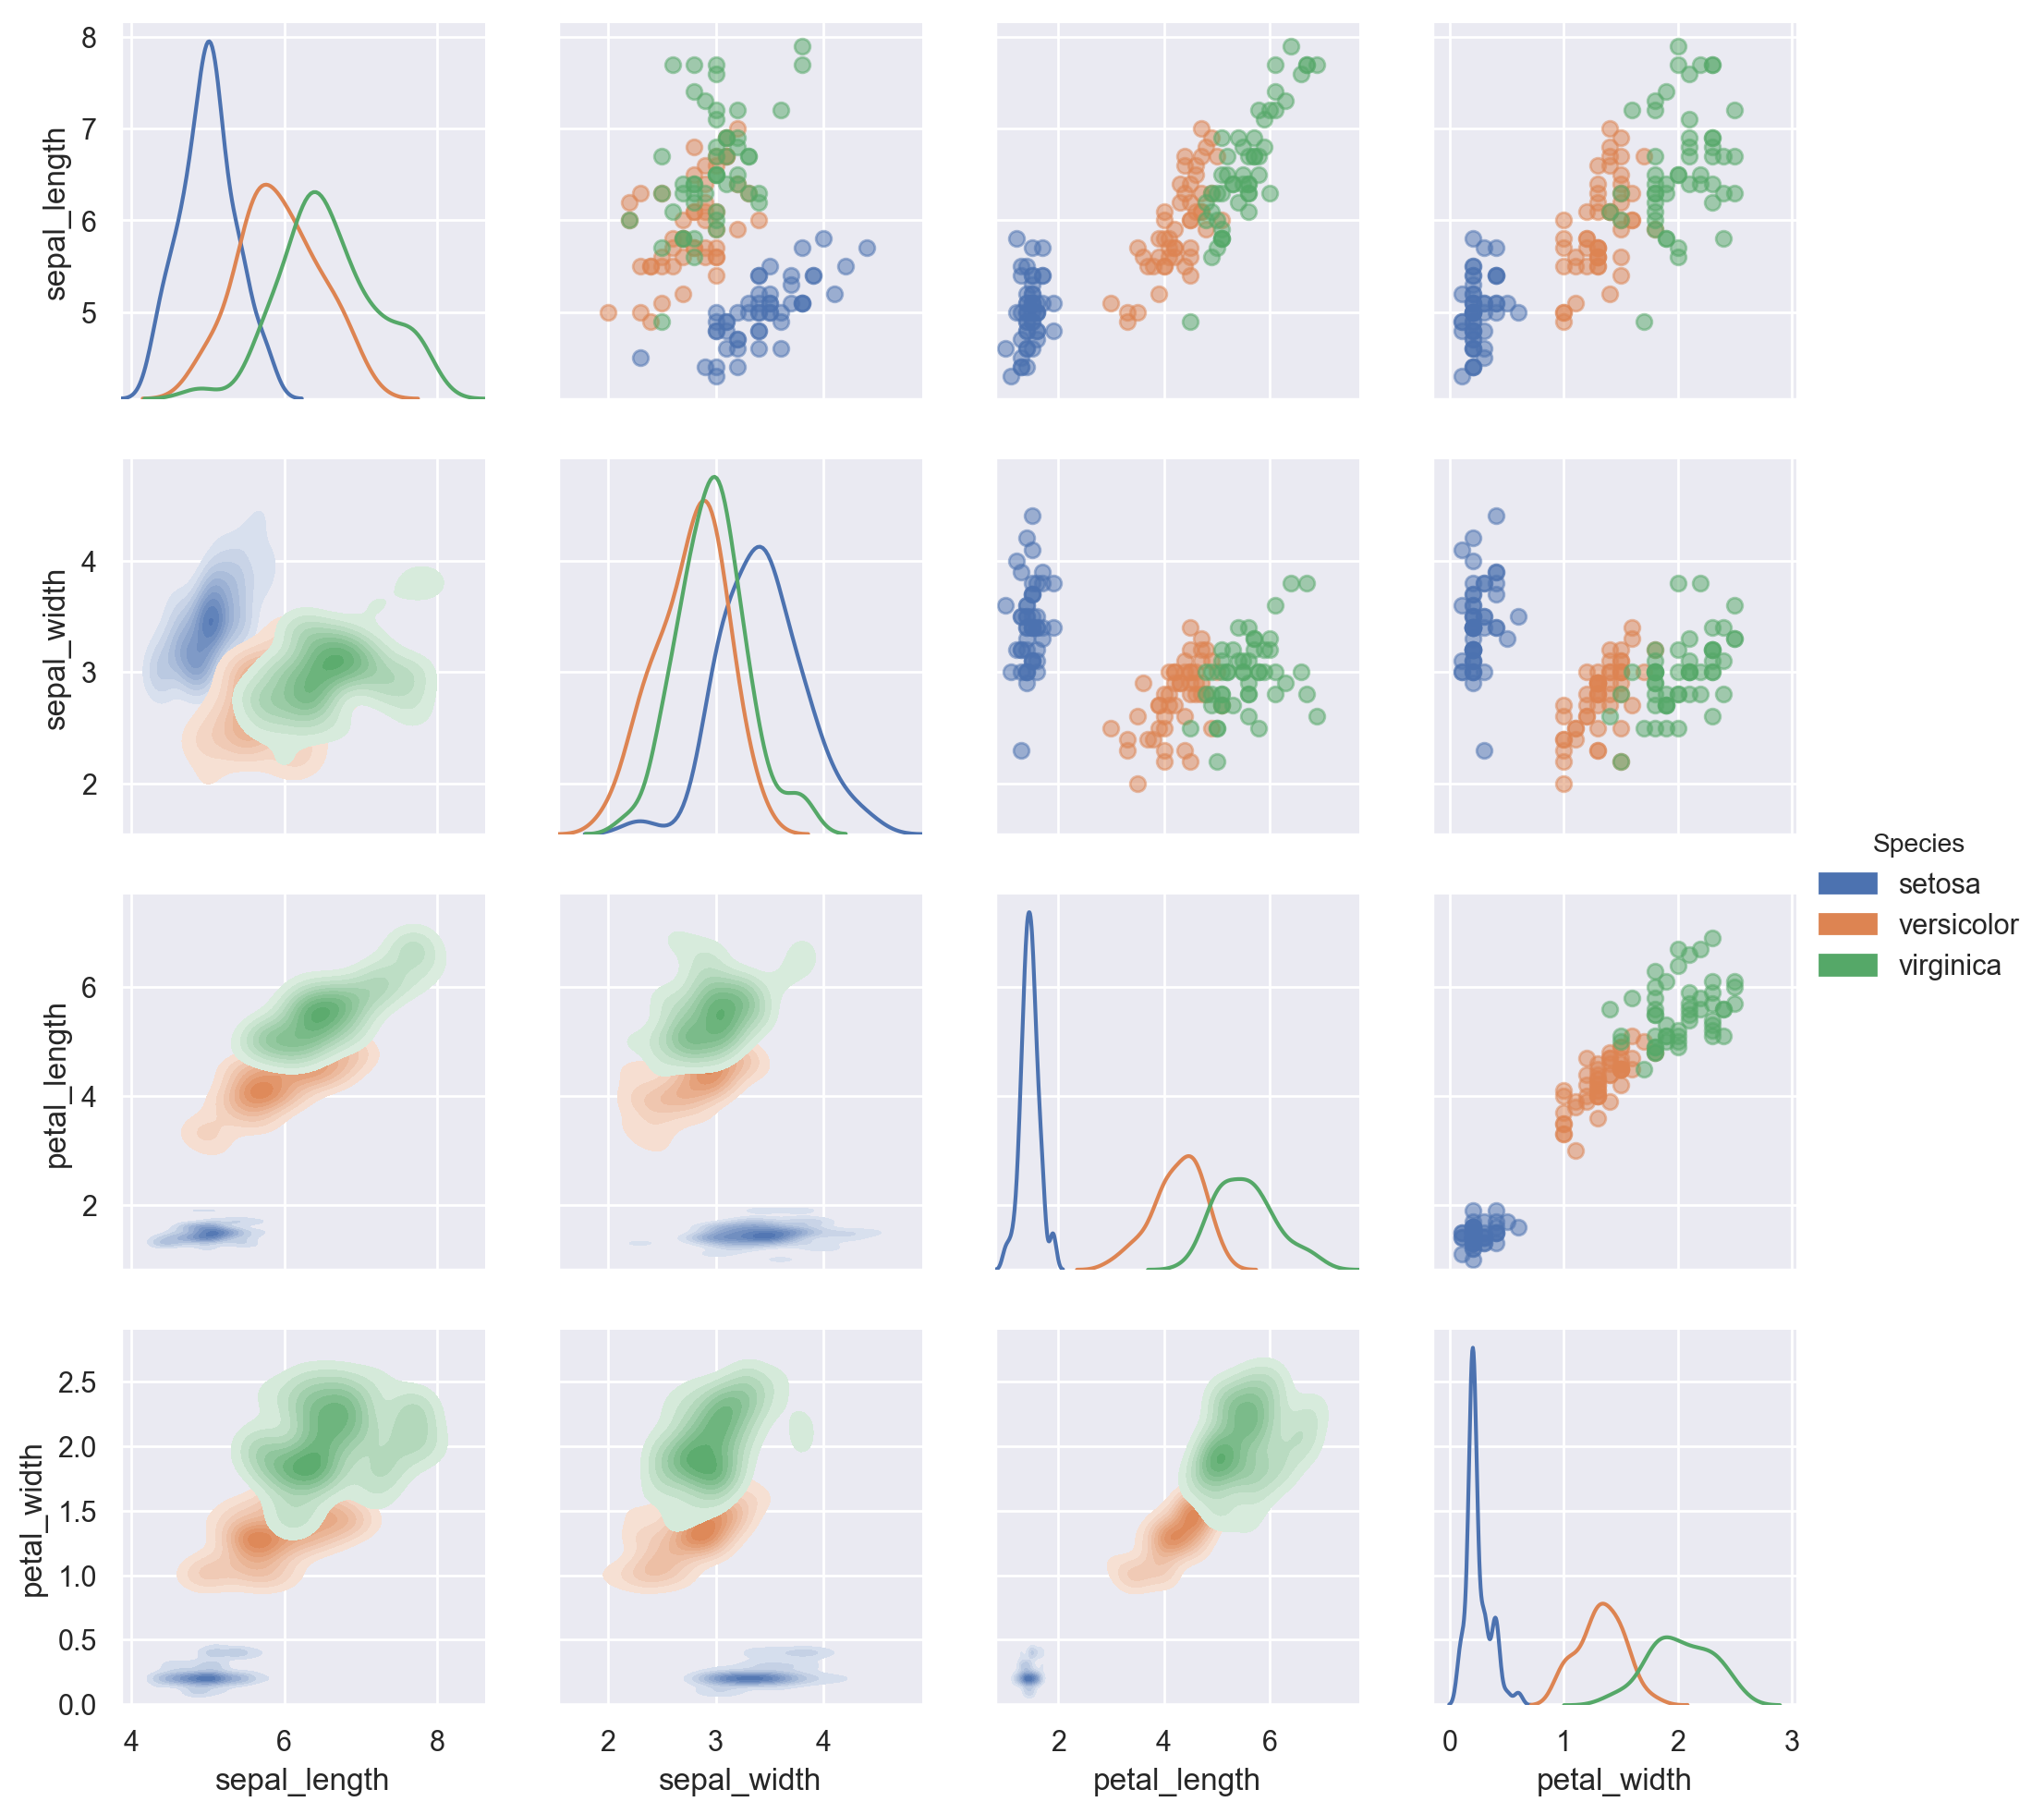

In [24]:
g = sns.PairGrid(iris, diag_sharey=False, hue='species')

g.map_diag(sns.kdeplot)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.kdeplot, shade=True, shade_lowest=False)

g.add_legend(title='Species');

#### Linear relationships

Best-fit line and confidence interval:

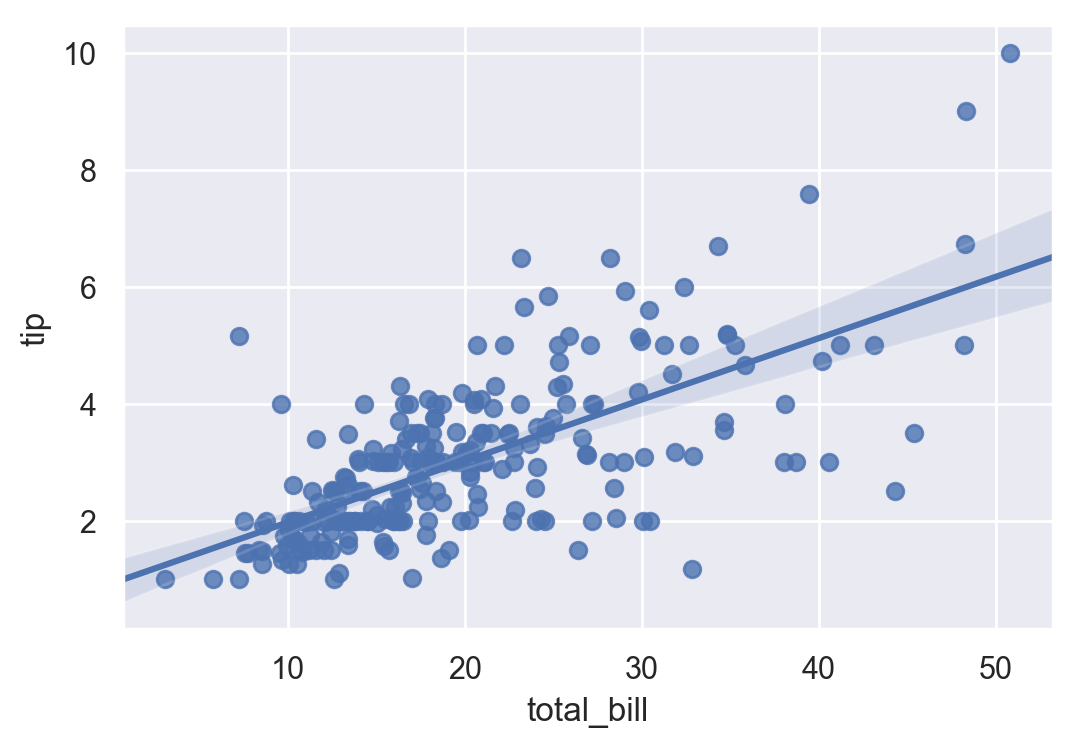

In [25]:
sns.regplot(data=tips, x='total_bill', y='tip');

Show histograms on the sides:

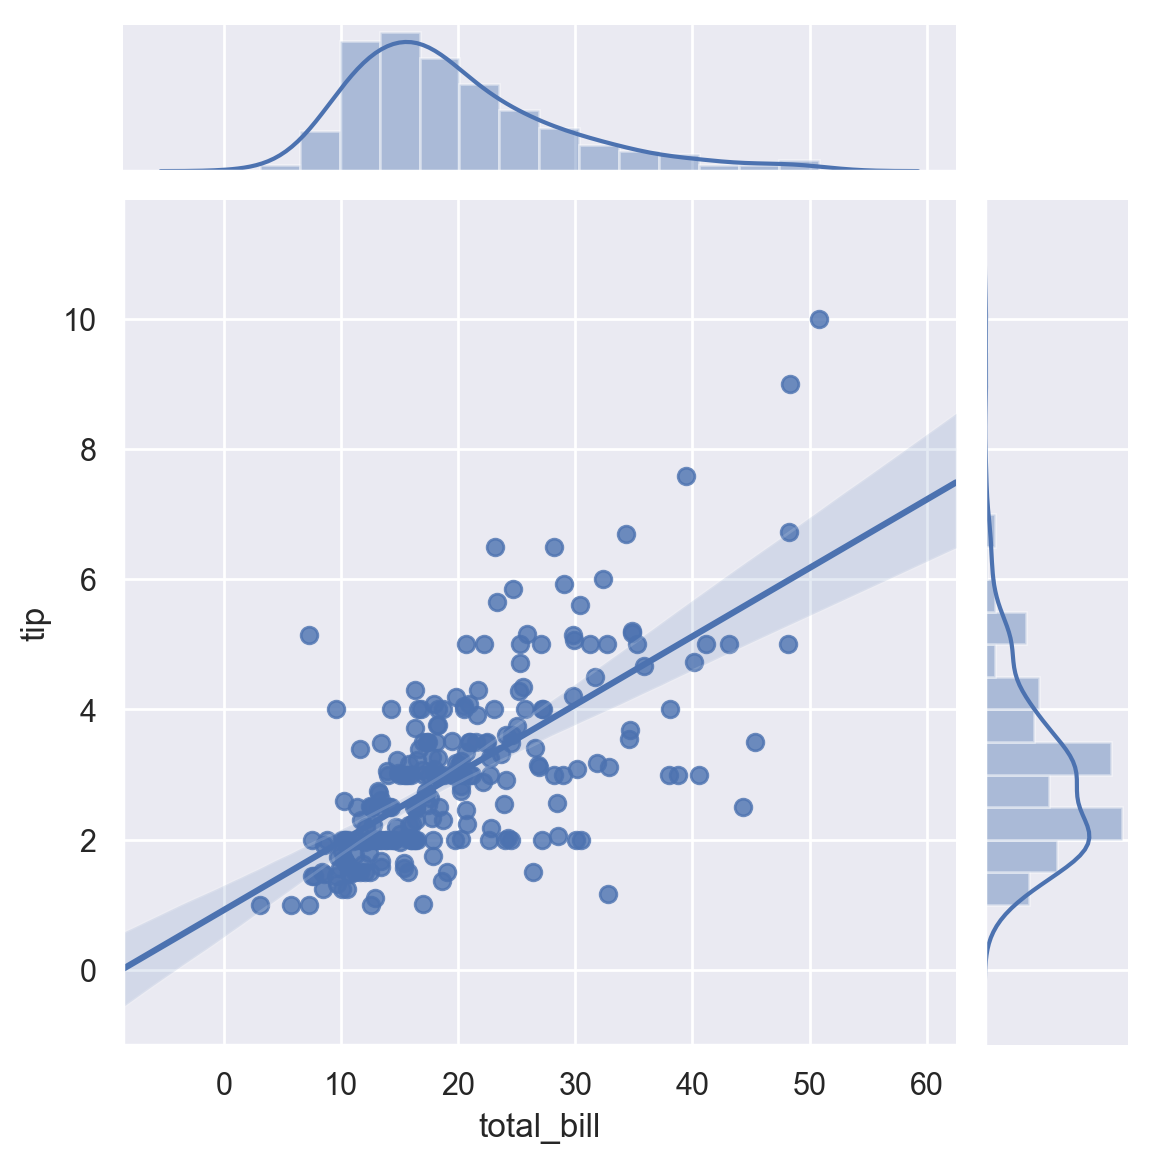

In [26]:
sns.jointplot(kind='reg', data=tips, x='total_bill', y='tip');

#### Heatmaps

We'll use the `flights` dataset, which contains the number of passagers for some flights over a period of time:

In [27]:
flights = sns.load_dataset('flights').pivot('month', 'year', 'passengers')

In [28]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


Present data in three dimensions. The z-axis (color intensity) represents the number of passengers:

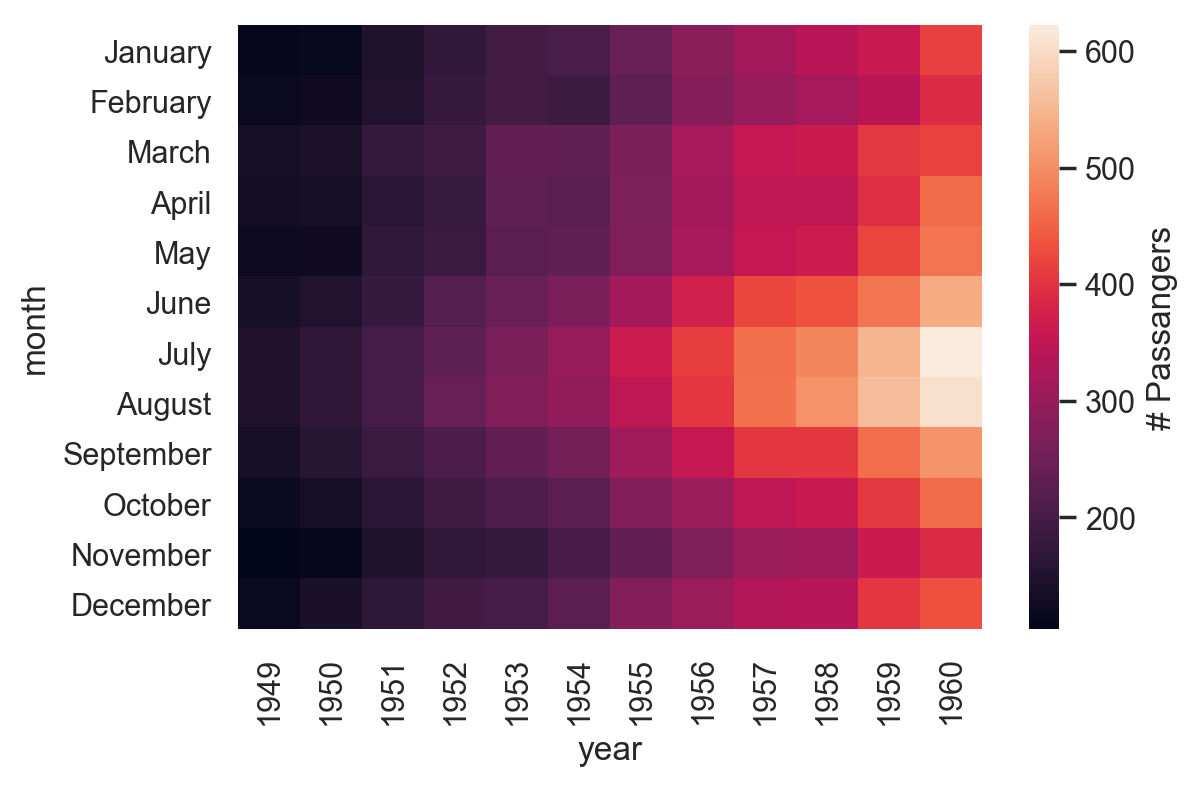

In [29]:
sns.heatmap(flights, cbar_kws=dict(label='# Passangers'));

**ℹ️ Tip**: it is intuitive to represent larger values by darker colors:

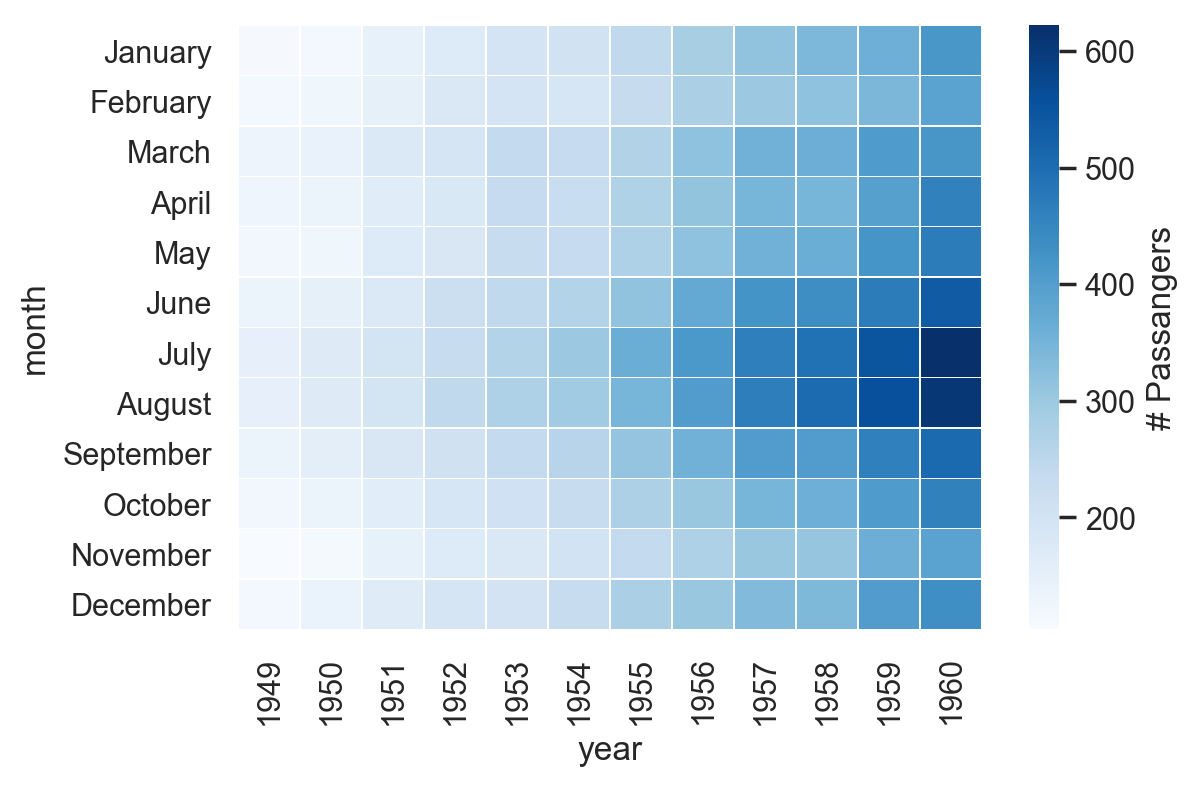

In [30]:
sns.heatmap(
    flights, 
    cbar_kws=dict(label='# Passangers'),
    cmap='Blues',
    lw=.1,
);

**ℹ️ Tip**: reverse any colormap by appending `_r` to its name.

Other sequential colormaps:

![pic](https://i.imgur.com/oqfPvJX.png)

---

Sometimes you have diverging data, such as the correlation: two variables can be correlated either positively (both increase and decrease at the same time) or negatively (when one increases, the other decreases). So we adapt to a diverging colormap.

In [31]:
crashes = sns.load_dataset('car_crashes')
crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


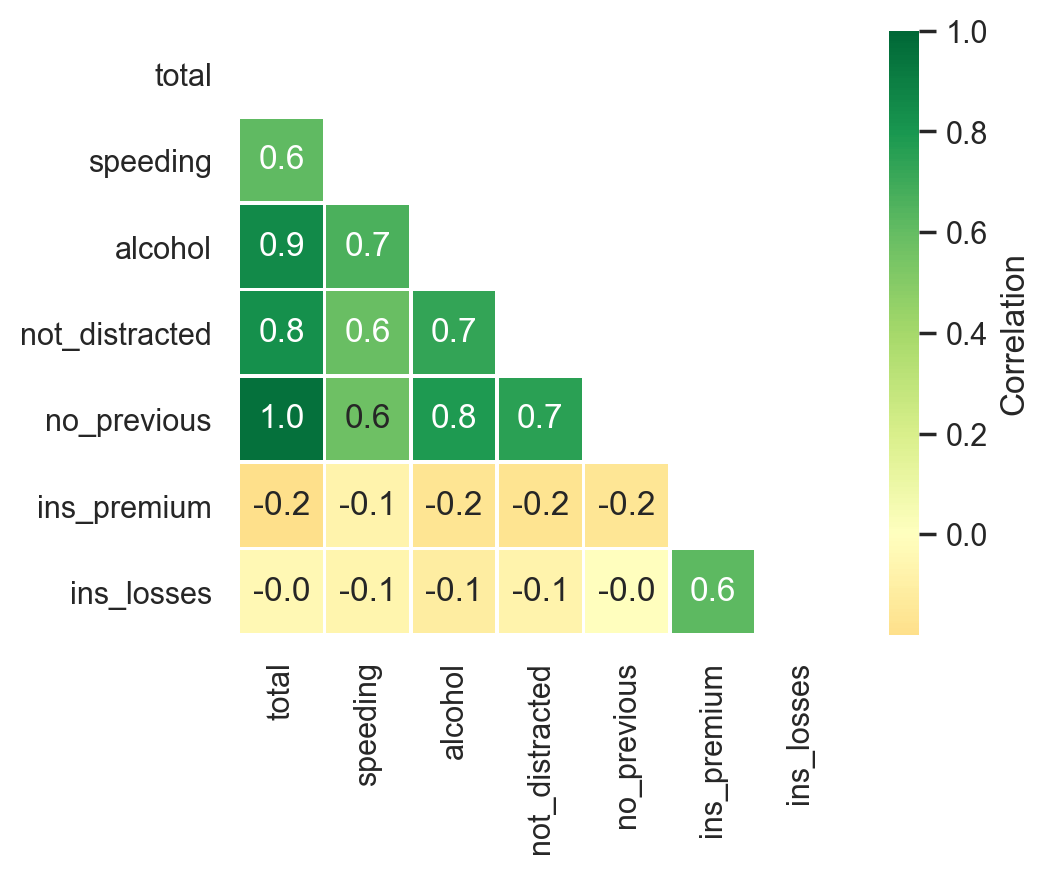

In [32]:
corr = crashes.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(corr, 
                     mask=mask,
                     cbar_kws=dict(label='Correlation'),
                     cmap='RdYlGn', 
                     center=0, #vmin=-.5,
                     annot=True, 
                     fmt='.1f', 
                     lw=1,
                     square=True)

Other diverging colormaps:

![pic](https://i.imgur.com/9H9J71j.png)

**ℹ️ Tip**: see the rest of available colormaps and color palettes: [matplotlib](https://matplotlib.org/tutorials/colors/colormaps.html), [seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html). Use tools such as [Color Brewer](http://colorbrewer2.org) to help pick color schemes. [Adobe Color Wheel](https://color.adobe.com/create/color-wheel/) is a good tool for general-purpose palette selection. Online [palette generators](https://coolors.co/app) make exploring colors easy.

---

Set the syle back to the original Matplotlib defaults:

In [33]:
sns.reset_orig()